In [1]:
#!pip install tensorflow

# Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\henry\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("data_0.csv")
df.head()

,dependent_var_cont,dependent_var_binary,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,4.662495,1,-0.020203,-1.272966,1.794028,4.186261,-1.583283,1,0,0,0
1,4.992336,1,-0.094311,-0.891598,1.539495,3.980735,-1.964685,0,0,1,0
2,4.522223,1,-0.235722,-1.347074,1.302948,3.626135,-1.755620,0,1,0,0
3,4.127296,0,-0.210721,-0.274437,1.376186,3.812485,-2.587604,0,1,0,0
4,3.239854,0,-0.198451,-1.203973,0.215049,3.229904,-2.029509,0,1,0,0


split into training and test data sets

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5','feature_6', 'feature_7','feature_8']].values
y = df['dependent_var_cont'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scale the data

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)  #combines scaler.fit(X_train)  then X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

create artificial neural network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
X_train.shape

(422, 9)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", verbose=1, patience=25)  #early stop makes model quit training when over fitting starts happening
model = Sequential()

model.add(Dense(9, activation="relu"))    #rule of thumb: X_train has 9 features so start with 9
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))

model.add(Dense(1, activation=None))

#Choosing and optimizer and loss:
# for a regression problem: model.compile(optimizer='rmsprop', loss='mse')
# also optimizer="adam" works as well
model.compile(optimizer='rmsprop', loss='mse')



model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),       #validation_data argument gives you option to compare training and test validation
          epochs=600, callbacks=[early_stop], verbose=1)

#if data is vary large consider providing a number for the batch_size argument,
#i.e batch_side =128


Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 16.8396 - val_loss: 16.7698
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.7135 - val_loss: 16.2593
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.0602 - val_loss: 15.6990
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5854 - val_loss: 15.0378
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8122 - val_loss: 14.2350
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6215 - val_loss: 13.3091
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.6789 - val_loss: 12.3121
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8772 - val_loss: 11.1836
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1720 - val_loss: 9.8401
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5295 - val_loss: 8.3903
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3152 - val_loss: 6.9412
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2298 - val_loss: 0.2187
Epoch 70/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2357 - val_loss: 0.2152
Epoch 71/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2039 - val_loss: 0.2266
Epoch 72/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2269 - val_loss: 0.2129
Epoch 73/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2178 - val_loss: 0.2244
Epoch 74/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2309 - val_loss: 0.2138
Epoch 75/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2227 - val_loss: 0.2136
Epoch 76/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2311 - val_loss: 0.2151
Epoch 77/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2173 - val_loss: 0.2181
Epoch 78/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2327 - val_loss: 0.2162
Epoch 79/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2422 - val_loss: 0.2137
Epoch 80/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2400 

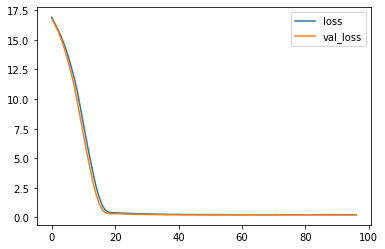

In [12]:
pd.DataFrame(model.history.history).plot()
plt.show()

## How to interpret chart above:
If orange line starts to rise, then there is indication of overfitting.
Above that is not the issue.

## Model assessment

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [14]:
predictions = model.predict(X_test)
#mean_squared_error(y_test, predictions)

#get mean square error on test set
display(model.evaluate(X_test, y_test, verbose=0))

#get root mean squared error
display(np.sqrt(model.evaluate(X_test, y_test, verbose=0)))

#mean_absolute_error most straight forward evaluation metric
display(mean_absolute_error(y_test, predictions))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


0.2134949117898941

0.46205509605445766

0.36369706823751824

## Is a mean_absolute_error good?
depends on the dataframe. 

In [15]:
df['dependent_var_cont'].describe()

count    630.000000
mean       4.090921
std        0.742231
min        2.543176
25%        3.520978
50%        4.072353
75%        4.625925
max        5.822928
Name: dependent_var_cont, dtype: float64

The mean of the dependent variable is 4.09, which means a mean_absolute_error of 0.39 means the model is on average off by 0.36/4.09 or approximately 10 percent. It is up to the user if that is a good score or not. 

## Predicting with new data:

In [16]:
#           feature_0, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8
new_data = [[-0.083382, -1.203973, 0.829530, 3.958072,  -2.071871, 1, 0, 1, 0]]

In [17]:
new_data = scaler.transform(new_data)
model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[4.501321]], dtype=float32)

## saving a model for later use

In [18]:
from tensorflow.keras.models import load_model

In [19]:
#model.save('my_regression_model.h5')
model.save('my_regression_model.keras')

In [20]:
##useing the saved model in the next notebook:
#from tensorflow.keras.models import load_model
#later_model = load_model('my_regression_model.keras')
#later_model.predict(scaler.transform([[0.964006, 3.726185, 0.180000]]))